# Dang Thanh Vu - 197796 - Homework 2: Function Approximation

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


2D Gaussian Distribution

In [2]:
mean = np.array([0, 0])
cov = np.array([[0.3, -0.5], [-0.5, 2]])

# plot the Gaussian distribution

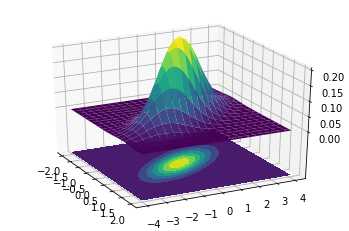

In [3]:
X1 = np.linspace(-2, 2, 60)
X2 = np.linspace(-4, 4, 60)
X1, X2 = np.meshgrid(X1, X2)
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1
pos[:, :, 1] = X2

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mean, cov)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
cset = ax.contourf(X1, X2, Z, zdir='z', offset=-0.15, cmap=cm.viridis)
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -27)
plt.show()

In [4]:
def generate_dataset(mean, cov, N):
    x = np.random.multivariate_normal(mean, cov, N)
    y = multivariate_normal(mean, cov).pdf(x)
    return x, y


Generating training data

(-2.396291099578225, 1.635601057202873, -4.316704779624331, 5.34252683006154)

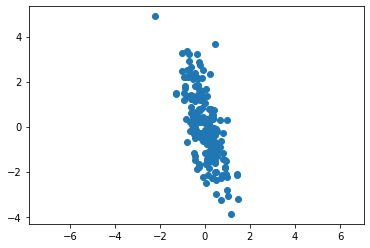

In [5]:
x_train, y_train = generate_dataset(mean, cov, 200)
plt.plot(x_train[:, 0], x_train[:, 1], 'o')
plt.axis('equal')

Generating test data

(-1.6513776868618861, 1.6610475824354085, -4.86175730602407, 4.251409716641504)

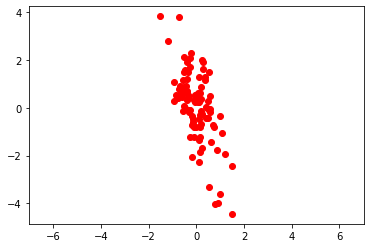

In [6]:
x_test, y_test = generate_dataset(mean, cov, 100)
plt.plot(x_test[:, 0], x_test[:, 1], 'or')
plt.axis('equal')

Build model: 2 input nodes -> H hidden nodes -> 1 output node

In [7]:
def baseline_model(H = 10):
    # create model
    model = Sequential()
    model.add(Dense(H, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, input_dim=H, kernel_initializer='normal', activation="linear"))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='SGD')
    return model
        

Model Fitting

In [8]:
model1 = baseline_model(H = 10)
history = model1.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1000, batch_size=10)
clear_output()

# Performance against the number of epochs

dict_keys(['val_loss', 'loss'])


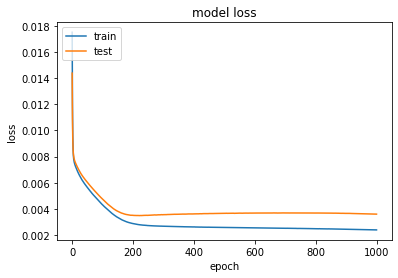

In [9]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

=> The more iterations, the smaller error

In [10]:
model2 = baseline_model(H = 10)
train_loss = []
test_loss = []
for no_of_training_samples in range(50, 501, 50):
    x_train, y_train = generate_dataset(mean, cov, no_of_training_samples)
    history = model2.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1000, batch_size = 10)
    train_loss.append(history.history['loss'][-1])
    test_loss.append(history.history['val_loss'][-1])
clear_output()



# Performance against the number of training samples

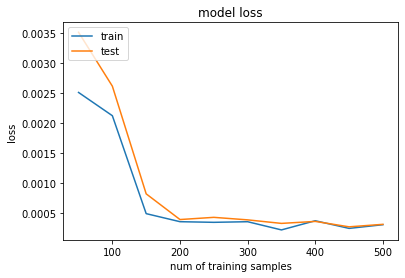

In [11]:
no_of_samples = range(50, 501, 50)
plt.plot(no_of_samples, train_loss)
plt.plot(no_of_samples, test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('num of training samples')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The more training samples, the smaller error. However, saturation occurs when the number of training samples = 200

In [16]:
train_loss = []
test_loss = []
x_train, y_train = generate_dataset(mean, cov, 200)
x_test, y_test = generate_dataset(mean, cov, 200)
for h in range(1, 11):
    model = baseline_model(H = h)
    history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1000, batch_size = 10)
    train_loss.append(history.history['loss'][-1])
    test_loss.append(history.history['val_loss'][-1])

Train on 200 samples, validate on 200 samples
Epoch 1/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0141
Epoch 2/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0116 - val_loss: 0.0098
Epoch 3/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0086 - val_loss: 0.0079
Epoch 4/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0073 - val_loss: 0.0070
Epoch 5/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0067 - val_loss: 0.0066
Epoch 6/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0064 - val_loss: 0.0065
Epoch 7/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0063 - val_loss: 0.0064
Epoch 8/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0062 - val_loss: 0.0063
Epoch 9/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0062 - val_loss: 0.0063
Epoch 10/1000
200/20

200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 79/1000
200/200 [==============================] - 0s 111us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 80/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 81/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 82/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 83/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 84/1000
200/200 [==============================] - 0s 98us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 85/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 86/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 87/1000
200/200 [==============================] - 0s 105us/step 

200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 156/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 157/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 158/1000
200/200 [==============================] - 0s 96us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 159/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 160/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 161/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 162/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 163/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 164/1000
200/200 [==============================] - 0s 10

200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 233/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 234/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 235/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 236/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 237/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 238/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 239/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 240/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 241/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 310/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 311/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 312/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 313/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 314/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 315/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 316/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 317/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 318/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 120us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 387/1000
200/200 [==============================] - 0s 98us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 388/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 389/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 390/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 391/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 392/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 393/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 394/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 395/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 125us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 464/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 465/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 466/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 467/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 468/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 469/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 470/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 471/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 472/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 106us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 541/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 542/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 543/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 544/1000
200/200 [==============================] - 0s 116us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 545/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 546/1000
200/200 [==============================] - 0s 114us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 547/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 548/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 549/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 104us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 618/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 619/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 620/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 621/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 622/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 623/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 624/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 625/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 626/1000
200/200 [==============================] - 0s 9

200/200 [==============================] - 0s 94us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 695/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 696/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 697/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 698/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 699/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 700/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 701/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 702/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 703/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 772/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 773/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 774/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 775/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 776/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 777/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 778/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 779/1000
200/200 [==============================] - 0s 99us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 780/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 849/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 850/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 851/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 852/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 853/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 854/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 855/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 856/1000
200/200 [==============================] - 0s 111us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 857/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 926/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 927/1000
200/200 [==============================] - 0s 99us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 928/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 929/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 930/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 931/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 932/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 933/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0061 - val_loss: 0.0062
Epoch 934/1000
200/200 [==============================] - 0s 10

200/200 [==============================] - 0s 103us/step - loss: 0.0115 - val_loss: 0.0097
Epoch 3/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0085 - val_loss: 0.0077
Epoch 4/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0072 - val_loss: 0.0069
Epoch 5/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0066 - val_loss: 0.0064
Epoch 6/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0063 - val_loss: 0.0063
Epoch 7/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 8/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 9/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 10/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 11/1000
200/200 [==============================] - 0s 103us/step - los

200/200 [==============================] - 0s 130us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 81/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 82/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 83/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 84/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 85/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 86/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 87/1000
200/200 [==============================] - 0s 114us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 88/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 89/1000
200/200 [==============================] - 0s 109us/ste

200/200 [==============================] - 0s 105us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 158/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 159/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 160/1000
200/200 [==============================] - 0s 99us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 161/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0055 - val_loss: 0.0054
Epoch 162/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 163/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 164/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 165/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 166/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 105us/step - loss: 0.0045 - val_loss: 0.0043
Epoch 235/1000
200/200 [==============================] - 0s 128us/step - loss: 0.0045 - val_loss: 0.0043
Epoch 236/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0045 - val_loss: 0.0043
Epoch 237/1000
200/200 [==============================] - 0s 119us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 238/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 239/1000
200/200 [==============================] - 0s 96us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 240/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0044 - val_loss: 0.0042
Epoch 241/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0044 - val_loss: 0.0042
Epoch 242/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0044 - val_loss: 0.0042
Epoch 243/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 105us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 312/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 313/1000
200/200 [==============================] - 0s 94us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 314/1000
200/200 [==============================] - 0s 98us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 315/1000
200/200 [==============================] - 0s 122us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 316/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 317/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 318/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 319/1000
200/200 [==============================] - 0s 101us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 320/1000
200/200 [==============================] - 0s 10

200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 389/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 390/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 391/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 392/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 393/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 394/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 395/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 396/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 397/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 466/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 467/1000
200/200 [==============================] - 0s 101us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 468/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 469/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 470/1000
200/200 [==============================] - 0s 99us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 471/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 472/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 473/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 474/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 100us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 543/1000
200/200 [==============================] - 0s 95us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 544/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 545/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 546/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 547/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 548/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 549/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 550/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 551/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 130us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 620/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 621/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 622/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 623/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 624/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 625/1000
200/200 [==============================] - 0s 123us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 626/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 627/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 628/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 697/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 698/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 699/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 700/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 701/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 702/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 703/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 704/1000
200/200 [==============================] - 0s 121us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 705/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 774/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 775/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 776/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 777/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 778/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 779/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 780/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 781/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 782/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 851/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 852/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 853/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 854/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 855/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 856/1000
200/200 [==============================] - 0s 101us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 857/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 858/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 859/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 102us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 928/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 929/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 930/1000
200/200 [==============================] - 0s 99us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 931/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 932/1000
200/200 [==============================] - 0s 101us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 933/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 934/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 935/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 936/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 115us/step - loss: 0.0070 - val_loss: 0.0066
Epoch 5/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0064 - val_loss: 0.0062
Epoch 6/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0061 - val_loss: 0.0060
Epoch 7/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0060 - val_loss: 0.0059
Epoch 8/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 9/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 10/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0058 - val_loss: 0.0058
Epoch 11/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0058 - val_loss: 0.0058
Epoch 12/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 13/1000
200/200 [==============================] - 0s 110us/step - l

200/200 [==============================] - 0s 127us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 83/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 84/1000
200/200 [==============================] - 0s 114us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 85/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 86/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 87/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 88/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 89/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 90/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 91/1000
200/200 [==============================] - 0s 101us/ste

200/200 [==============================] - 0s 105us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 160/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 161/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 162/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 163/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 164/1000
200/200 [==============================] - 0s 97us/step - loss: 0.0053 - val_loss: 0.0050
Epoch 165/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0053 - val_loss: 0.0049
Epoch 166/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0053 - val_loss: 0.0049
Epoch 167/1000
200/200 [==============================] - 0s 234us/step - loss: 0.0053 - val_loss: 0.0049
Epoch 168/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 125us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 237/1000
200/200 [==============================] - 0s 116us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 238/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 239/1000
200/200 [==============================] - 0s 111us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 240/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 241/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 242/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 243/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 244/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 245/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 135us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 314/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 315/1000
200/200 [==============================] - 0s 124us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 316/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 317/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 318/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 319/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 320/1000
200/200 [==============================] - 0s 157us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 321/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 322/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 391/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 392/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 393/1000
200/200 [==============================] - 0s 122us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 394/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 395/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 396/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 397/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 398/1000
200/200 [==============================] - 0s 127us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 399/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 139us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 468/1000
200/200 [==============================] - 0s 145us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 469/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 470/1000
200/200 [==============================] - 0s 136us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 471/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 472/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 473/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 474/1000
200/200 [==============================] - 0s 150us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 475/1000
200/200 [==============================] - 0s 150us/step - loss: 0.0052 - val_loss: 0.0048
Epoch 476/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 545/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 546/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 547/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 548/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 549/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 550/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 551/1000
200/200 [==============================] - 0s 155us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 552/1000
200/200 [==============================] - 0s 277us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 553/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 622/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 623/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 624/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 625/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 626/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 627/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 628/1000
200/200 [==============================] - 0s 126us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 629/1000
200/200 [==============================] - 0s 98us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 630/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 100us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 699/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 700/1000
200/200 [==============================] - 0s 99us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 701/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 702/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 703/1000
200/200 [==============================] - 0s 116us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 704/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 705/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 706/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 707/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 776/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 777/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 778/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 779/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 780/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 781/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 782/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 783/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 784/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 853/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 854/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 855/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 856/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 857/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 858/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 859/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 860/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 861/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 130us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 930/1000
200/200 [==============================] - 0s 116us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 931/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 932/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 933/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 934/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 935/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 936/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 937/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 938/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 7/1000
200/200 [==============================] - 0s 133us/step - loss: 0.0062 - val_loss: 0.0062
Epoch 8/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 9/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 10/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 11/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 12/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 13/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0060 - val_loss: 0.0061
Epoch 14/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0060 - val_loss: 0.0060
Epoch 15/1000
200/200 [==============================] - 0s 105us/step -

200/200 [==============================] - 0s 115us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 85/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 86/1000
200/200 [==============================] - 0s 121us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 87/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 88/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 89/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0056 - val_loss: 0.0055
Epoch 90/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 91/1000
200/200 [==============================] - 0s 98us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 92/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 93/1000
200/200 [==============================] - 0s 108us/step

200/200 [==============================] - 0s 105us/step - loss: 0.0048 - val_loss: 0.0046
Epoch 162/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0048 - val_loss: 0.0046
Epoch 163/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0048 - val_loss: 0.0045
Epoch 164/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0048 - val_loss: 0.0045
Epoch 165/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 166/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 167/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 168/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 169/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 170/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 135us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 239/1000
200/200 [==============================] - 0s 119us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 240/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 241/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 242/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 243/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0037 - val_loss: 0.0035
Epoch 244/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 245/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 246/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 247/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 316/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 317/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 318/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 319/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 320/1000
200/200 [==============================] - 0s 111us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 321/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 322/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 323/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 324/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 393/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 394/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 395/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 396/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 397/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 398/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 399/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 400/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 401/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 113us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 470/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 471/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 472/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 473/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 474/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 475/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 476/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 477/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 478/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 129us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 547/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 548/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 549/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 550/1000
200/200 [==============================] - 0s 132us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 551/1000
200/200 [==============================] - 0s 127us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 552/1000
200/200 [==============================] - 0s 134us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 553/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 554/1000
200/200 [==============================] - 0s 121us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 555/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 104us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 624/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 625/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 626/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 627/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 628/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 629/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 630/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 631/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 632/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 104us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 701/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 702/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 703/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 704/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 705/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 706/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 707/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 708/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 709/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 778/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 779/1000
200/200 [==============================] - 0s 123us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 780/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 781/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 782/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 783/1000
200/200 [==============================] - 0s 101us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 784/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 785/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 786/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 855/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 856/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 857/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 858/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 859/1000
200/200 [==============================] - 0s 121us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 860/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 861/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 862/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 863/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 932/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 933/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 934/1000
200/200 [==============================] - 0s 119us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 935/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 936/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 937/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 938/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 939/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 940/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 130us/step - loss: 0.0060 - val_loss: 0.0059
Epoch 9/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0060 - val_loss: 0.0059
Epoch 10/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 11/1000
200/200 [==============================] - 0s 123us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 12/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 13/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 14/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 15/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 16/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 17/1000
200/200 [==============================] - 0s 100us/step

200/200 [==============================] - 0s 109us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 87/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 88/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 89/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 90/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 91/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 92/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 93/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 94/1000
200/200 [==============================] - 0s 116us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 95/1000
200/200 [==============================] - 0s 110us/ste

200/200 [==============================] - 0s 120us/step - loss: 0.0041 - val_loss: 0.0038
Epoch 164/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0041 - val_loss: 0.0038
Epoch 165/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0041 - val_loss: 0.0038
Epoch 166/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0041 - val_loss: 0.0038
Epoch 167/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0041 - val_loss: 0.0038
Epoch 168/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 169/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 170/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 171/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0040 - val_loss: 0.0037
Epoch 172/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 241/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 242/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 243/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 244/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 245/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 246/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 247/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 248/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 249/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 318/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 319/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 320/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 321/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 322/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 323/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 324/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 325/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 326/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 395/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 396/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 397/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 398/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 399/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 400/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 401/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 402/1000
200/200 [==============================] - 0s 101us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 403/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 134us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 472/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 473/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 474/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 475/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 476/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 477/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 478/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 479/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 480/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 549/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 550/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 551/1000
200/200 [==============================] - 0s 97us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 552/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 553/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 554/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 555/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 556/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 557/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 128us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 626/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 627/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 628/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 629/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 630/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 631/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 632/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 633/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 634/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 139us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 703/1000
200/200 [==============================] - 0s 99us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 704/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 705/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 706/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 707/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 708/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 709/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 710/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 711/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 113us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 780/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 781/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 782/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 783/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 784/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 785/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 786/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 787/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 788/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 857/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 858/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 859/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 860/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 861/1000
200/200 [==============================] - 0s 126us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 862/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 863/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 864/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 865/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 130us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 934/1000
200/200 [==============================] - 0s 145us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 935/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 936/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 937/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 938/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 939/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 940/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 941/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0024 - val_loss: 0.0025
Epoch 942/1000
200/200 [==============================] - 0s 

Epoch 10/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 11/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 12/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 13/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 14/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 15/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 16/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 17/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 18/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 19/1000
200/200 [==============================] 

200/200 [==============================] - 0s 110us/step - loss: 0.0052 - val_loss: 0.0051
Epoch 89/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0052 - val_loss: 0.0051
Epoch 90/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0051
Epoch 91/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0051
Epoch 92/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 93/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 94/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 95/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 96/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0051 - val_loss: 0.0050
Epoch 97/1000
200/200 [==============================] - 0s 105us/ste

200/200 [==============================] - 0s 125us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 166/1000
200/200 [==============================] - 0s 155us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 167/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 168/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 169/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 170/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0039 - val_loss: 0.0037
Epoch 171/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0039 - val_loss: 0.0037
Epoch 172/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0039 - val_loss: 0.0037
Epoch 173/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 174/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 124us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 243/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 244/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 245/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 246/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 247/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 248/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 249/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 250/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 251/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 320/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 321/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 322/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 323/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 324/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 325/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 326/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 327/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 328/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 397/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 398/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 399/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 400/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 401/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 402/1000
200/200 [==============================] - 0s 119us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 403/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 404/1000
200/200 [==============================] - 0s 101us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 405/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 474/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 475/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 476/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 477/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 478/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 479/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 480/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 481/1000
200/200 [==============================] - 0s 111us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 482/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 551/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 552/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 553/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 554/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 555/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 556/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 557/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 558/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 559/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 103us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 628/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 629/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 630/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 631/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 632/1000
200/200 [==============================] - 0s 127us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 633/1000
200/200 [==============================] - 0s 133us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 634/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 635/1000
200/200 [==============================] - 0s 111us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 636/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 705/1000
200/200 [==============================] - ETA: 0s - loss: 0.001 - 0s 140us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 706/1000
200/200 [==============================] - 0s 145us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 707/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 708/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 709/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 710/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 711/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 712/1000
200/200 [==============================] - 0s 96us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 713/1000
200/200 [==============

200/200 [==============================] - 0s 111us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 782/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 783/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 784/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 785/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 786/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 787/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0017 - val_loss: 0.0019
Epoch 788/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 789/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 790/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 129us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 859/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 860/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 861/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 862/1000
200/200 [==============================] - 0s 98us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 863/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 864/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 865/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 866/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 867/1000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 110us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 936/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 937/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 938/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 939/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 940/1000
200/200 [==============================] - 0s 114us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 941/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 942/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 943/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 944/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0064 - val_loss: 0.0066
Epoch 12/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0064 - val_loss: 0.0066
Epoch 13/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0063 - val_loss: 0.0066
Epoch 14/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0063 - val_loss: 0.0065
Epoch 15/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0063 - val_loss: 0.0065
Epoch 16/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0063 - val_loss: 0.0065
Epoch 17/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0062 - val_loss: 0.0064
Epoch 18/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0062 - val_loss: 0.0064
Epoch 19/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0062 - val_loss: 0.0064
Epoch 20/1000
200/200 [==============================] - 0s 115us/ste

200/200 [==============================] - 0s 112us/step - loss: 0.0048 - val_loss: 0.0047
Epoch 90/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 91/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 92/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 93/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 94/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0047 - val_loss: 0.0046
Epoch 95/1000
200/200 [==============================] - 0s 108us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 96/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 97/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 98/1000
200/200 [==============================] - 0s 104us/ste

200/200 [==============================] - 0s 100us/step - loss: 0.0036 - val_loss: 0.0035
Epoch 167/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 168/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 169/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 170/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 171/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 172/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 173/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 174/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 175/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 244/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 245/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 246/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 247/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 248/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 249/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 250/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 251/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 252/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 108us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 321/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 322/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 323/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 324/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 325/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 326/1000
200/200 [==============================] - 0s 121us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 327/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 328/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 329/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 398/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 399/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 400/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 401/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 402/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 403/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 404/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 405/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 406/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 150us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 475/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 476/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 477/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 478/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 479/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 480/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 481/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 482/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 483/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 130us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 552/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 553/1000
200/200 [==============================] - 0s 123us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 554/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 555/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 556/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 557/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 558/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 559/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0030
Epoch 560/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 629/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 630/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0029
Epoch 631/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0029
Epoch 632/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0029
Epoch 633/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 634/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0029
Epoch 635/1000
200/200 [==============================] - 0s 133us/step - loss: 0.0027 - val_loss: 0.0029
Epoch 636/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0029
Epoch 637/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 706/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 707/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 708/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 709/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 710/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 711/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 712/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 713/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 714/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 783/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 784/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 785/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 786/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 787/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 788/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 789/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 790/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 791/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 860/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 861/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 862/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 863/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 864/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 865/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 866/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 867/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 868/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 100us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 937/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 938/1000
200/200 [==============================] - 0s 102us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 939/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 940/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 941/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 942/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 943/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 944/1000
200/200 [==============================] - 0s 129us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 945/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0057 - val_loss: 0.0057
Epoch 14/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0057 - val_loss: 0.0057
Epoch 15/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0057 - val_loss: 0.0057
Epoch 16/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 17/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 18/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 19/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 20/1000
200/200 [==============================] - 0s 126us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 21/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0056 - val_loss: 0.0056
Epoch 22/1000
200/200 [==============================] - 0s 130us/ste

200/200 [==============================] - 0s 145us/step - loss: 0.0045 - val_loss: 0.0044
Epoch 92/1000
200/200 [==============================] - 0s 111us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 93/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 94/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 95/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 96/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 97/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 98/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0043 - val_loss: 0.0042
Epoch 99/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0043 - val_loss: 0.0042
Epoch 100/1000
200/200 [==============================] - 0s 103us/st

200/200 [==============================] - 0s 120us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 169/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 170/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 171/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 172/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 173/1000
200/200 [==============================] - 0s 116us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 174/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 175/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 176/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 177/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 145us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 246/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 247/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 248/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 249/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 250/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 251/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 252/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 253/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 254/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 112us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 323/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 324/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 325/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 326/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 327/1000
200/200 [==============================] - 0s 100us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 328/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 329/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 330/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 331/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 400/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 401/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 402/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 403/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 404/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 405/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 406/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 407/1000
200/200 [==============================] - 0s 131us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 408/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 477/1000
200/200 [==============================] - 0s 126us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 478/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 479/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 480/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 481/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0025 - val_loss: 0.0027
Epoch 482/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0024 - val_loss: 0.0026
Epoch 483/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 484/1000
200/200 [==============================] - 0s 126us/step - loss: 0.0024 - val_loss: 0.0026
Epoch 485/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 140us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 554/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 555/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 556/1000
200/200 [==============================] - 0s 103us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 557/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 558/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 559/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 560/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 561/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0025
Epoch 562/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 150us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 631/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 632/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 633/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 634/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 635/1000
200/200 [==============================] - 0s 160us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 636/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 637/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 638/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0021 - val_loss: 0.0023
Epoch 639/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 145us/step - loss: 0.0018 - val_loss: 0.0021
Epoch 708/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0018 - val_loss: 0.0021
Epoch 709/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0018 - val_loss: 0.0021
Epoch 710/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0018 - val_loss: 0.0021
Epoch 711/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 712/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 713/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 714/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 715/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0018 - val_loss: 0.0020
Epoch 716/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 785/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 786/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 787/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 788/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 789/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 790/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 791/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 792/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0016 - val_loss: 0.0018
Epoch 793/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 862/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 863/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 864/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 865/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 866/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0014 - val_loss: 0.0016
Epoch 867/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 868/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 869/1000
200/200 [==============================] - 0s 123us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 870/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 939/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 940/1000
200/200 [==============================] - 0s 131us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 941/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 942/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 943/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 944/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 945/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 946/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 947/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 16/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 17/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 18/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 19/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0058 - val_loss: 0.0059
Epoch 20/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0058 - val_loss: 0.0059
Epoch 21/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0058 - val_loss: 0.0059
Epoch 22/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0058 - val_loss: 0.0058
Epoch 23/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0057 - val_loss: 0.0058
Epoch 24/1000
200/200 [==============================] - 0s 134us/ste

200/200 [==============================] - 0s 115us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 94/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 95/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 96/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 97/1000
200/200 [==============================] - 0s 122us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 98/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 99/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0043 - val_loss: 0.0042
Epoch 100/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0043 - val_loss: 0.0042
Epoch 101/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0043 - val_loss: 0.0042
Epoch 102/1000
200/200 [==============================] - 0s 155us/

200/200 [==============================] - 0s 110us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 171/1000
200/200 [==============================] - 0s 114us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 172/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 173/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 174/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 175/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 176/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 177/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 178/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 179/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 248/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 249/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 250/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 251/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 252/1000
200/200 [==============================] - 0s 128us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 253/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 254/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 255/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 256/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 325/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 326/1000
200/200 [==============================] - 0s 143us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 327/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 328/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 329/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 330/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 331/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 332/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 333/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 145us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 402/1000
200/200 [==============================] - 0s 109us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 403/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 404/1000
200/200 [==============================] - 0s 141us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 405/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 406/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 407/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 408/1000
200/200 [==============================] - 0s 114us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 409/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 410/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 145us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 479/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 480/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 481/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 482/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 483/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 484/1000
200/200 [==============================] - 0s 117us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 485/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 486/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 487/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 114us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 556/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 557/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 558/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 559/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 560/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 561/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 562/1000
200/200 [==============================] - 0s 116us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 563/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0023 - val_loss: 0.0024
Epoch 564/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 633/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 634/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 635/1000
200/200 [==============================] - 0s 122us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 636/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 637/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 638/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 639/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 640/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 641/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 710/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 711/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 712/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 713/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 714/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 715/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 716/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 717/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 718/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 787/1000
200/200 [==============================] - 0s 106us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 788/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 789/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 790/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 791/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 792/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 793/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 794/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 795/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 864/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 865/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 866/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 867/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 868/1000
200/200 [==============================] - 0s 104us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 869/1000
200/200 [==============================] - 0s 113us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 870/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 871/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 872/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 119us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 941/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 942/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 943/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 944/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 945/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 946/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 947/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 948/1000
200/200 [==============================] - 0s 111us/step - loss: 9.9702e-04 - val_loss: 0.0011
Epoch 949/1000
200/200 [==============================] -

200/200 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0061
Epoch 15/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0060 - val_loss: 0.0061
Epoch 16/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0060 - val_loss: 0.0060
Epoch 17/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0060 - val_loss: 0.0060
Epoch 18/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0060 - val_loss: 0.0060
Epoch 19/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0059 - val_loss: 0.0060
Epoch 20/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 21/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 22/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0058 - val_loss: 0.0059
Epoch 23/1000
200/200 [==============================] - 0s 130us/ste

200/200 [==============================] - 0s 115us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 93/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0043 - val_loss: 0.0042
Epoch 94/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 95/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 96/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 97/1000
200/200 [==============================] - 0s 170us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 98/1000
200/200 [==============================] - 0s 128us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 99/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 100/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0041 - val_loss: 0.0041
Epoch 101/1000
200/200 [==============================] - 0s 110us/s

200/200 [==============================] - 0s 110us/step - loss: 0.0033 - val_loss: 0.0033
Epoch 170/1000
200/200 [==============================] - 0s 150us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 171/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 172/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 173/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 174/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 175/1000
200/200 [==============================] - 0s 148us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 176/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 177/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 178/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 247/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 248/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 249/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 250/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 251/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 252/1000
200/200 [==============================] - 0s 107us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 253/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 254/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 255/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 324/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 325/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 326/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 327/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 328/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 329/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 330/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 331/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 332/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 401/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 402/1000
200/200 [==============================] - 0s 114us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 403/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 404/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 405/1000
200/200 [==============================] - 0s 121us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 406/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 407/1000
200/200 [==============================] - 0s 137us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 408/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0028 - val_loss: 0.0029
Epoch 409/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 478/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 479/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 480/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 481/1000
200/200 [==============================] - 0s 149us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 482/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 483/1000
200/200 [==============================] - 0s 112us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 484/1000
200/200 [==============================] - 0s 140us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 485/1000
200/200 [==============================] - 0s 127us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 486/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 110us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 555/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 556/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 557/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 558/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 559/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 560/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 561/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 562/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0024 - val_loss: 0.0026
Epoch 563/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 632/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 633/1000
200/200 [==============================] - 0s 145us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 634/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 635/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 636/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 637/1000
200/200 [==============================] - 0s 174us/step - loss: 0.0022 - val_loss: 0.0024
Epoch 638/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 639/1000
200/200 [==============================] - 0s 122us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 640/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 113us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 709/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 710/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 711/1000
200/200 [==============================] - 0s 130us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 712/1000
200/200 [==============================] - 0s 124us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 713/1000
200/200 [==============================] - 0s 125us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 714/1000
200/200 [==============================] - 0s 150us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 715/1000
200/200 [==============================] - 0s 128us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 716/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 717/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 112us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 786/1000
200/200 [==============================] - 0s 150us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 787/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 788/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 789/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 790/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 791/1000
200/200 [==============================] - 0s 135us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 792/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 793/1000
200/200 [==============================] - 0s 118us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 794/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 115us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 863/1000
200/200 [==============================] - 0s 154us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 864/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 865/1000
200/200 [==============================] - 0s 138us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 866/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 867/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 868/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 869/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 870/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 871/1000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 105us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 940/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 941/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 942/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 943/1000
200/200 [==============================] - 0s 110us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 944/1000
200/200 [==============================] - 0s 115us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 945/1000
200/200 [==============================] - 0s 123us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 946/1000
200/200 [==============================] - 0s 105us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 947/1000
200/200 [==============================] - 0s 120us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 948/1000
200/200 [==============================] - 0s 

# Performance against the number of hidden nodes

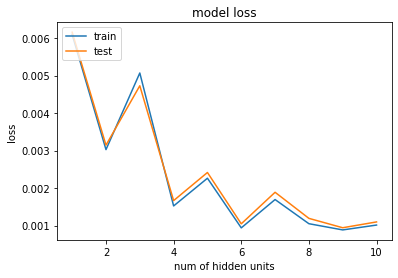

In [17]:
no_of_samples = range(1, 11)
plt.plot(no_of_samples, train_loss)
plt.plot(no_of_samples, test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('num of hidden units')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In general, the error decreases when the number of hidden units increases. However, the error reduces inconsitently

# Final decision: n.o hidden nodes = 8, n.o epochs = 1000 , n.o of training samples = 1000

In [20]:
x_train, y_train = generate_dataset(mean, cov, 1000)

model = baseline_model(H = 8)
history = model.fit(x_train, y_train, epochs=1000, batch_size=10)
clear_output()

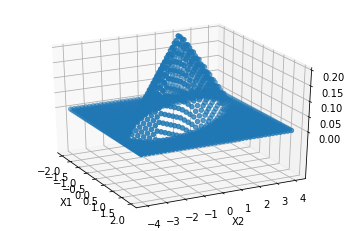

In [21]:
X1 = np.linspace(-2, 2, 40)
X2 = np.linspace(-4, 4, 40)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.reshape((-1, 1))
X2 = X2.reshape((-1, 1))
X = np.concatenate([X1, X2], axis = 1)

Y= model.predict(X)
Y[np.where(Y < 0)] = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1.flatten(), X2.flatten(), Y)
#ax.scatter(x_train[:, 0], x_train[:, 0], y_train)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -27)
plt.show()